In [1]:
# modulos y librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
catalog.list()

['hado_22',
 'hado_21',
 'hado_20',
 'hado_19',
 'hado_18',
 'hado_17',
 'hado_concat',
 'hado_clean',
 'hado_values',
 'parameters']

In [3]:
df = catalog.load('hado_clean')

[07/06/23 10:57:07] INFO     Loading data from 'hado_clean' (CSVDataSet)...                     data_catalog.py:345

# 1. EDA

Realizar un EDA para entender mejor cada variable, su distribución y su relación con 'n_estancias'. Este paso podría incluir la creación de histogramas, gráficos de caja y bigotes y gráficos de dispersión.

## 1.1 Inspeccion de los datos

In [4]:
df.head()

h_procedencia s_procedencia  ap otros                  diagnostico  \
0   gil casares          upal  no    no                   cancer orl   
1       clinico     oncologia  no    no              melanoma vulvar   
2       clinico           mir  no    no          cancer broncogenico   
3       clinico     digestivo  no    no            cirrosis hepatica   
4       clinico     urgencias  no    no  neplasia de mama estadio IV   

                   motivo_ing paliativo_onc_noc paliativo_no_onc_noc fiebre  \
0         control de sintomas                si                   si     no   
1           mal control dolor                si                   no     no   
2           control evolutivo                si                   si     no   
3  admininistacion octreotido                no                   no     no   
4         control de sintomas                si                   no     no   

  disnea dolor delirium otros_1 p_terminal agonia ps_ecog barthel gds_fast  \
0     no    si       no      no         si     no      40     300       no   
1     no    si       no      no         si     no      34      no       no   
2     si    no       no      no         no     no      34     400       no   
3     no    no       no      no         no     no      10     900       no   
4     si    si       no      no         si     no      40     300       no   

  eva_ing otros_2     otros_complicaciones  n_estancias  n_visitas sedacion  \
0      no      no   reingreso en urgencias           21         10       no   
1      no      no  met pulmonares y digest           24          8       no   
2      no      no                       no           14          6       no   
3      no      no                       no            1          1       no   
4      70      no                       no            2          1       no   

       motivo_alta        medico  year ast_anorx agudo_estable cronico_reag  \
0        reingreso        valdes  2017        si         vacio        vacio   
1           exitus   galego feal  2017        si         vacio        vacio   
2  fin de cuidados  lopez renedo  2017        no         vacio        vacio   
3  fin de cuidados  lopez renedo  2017        no         vacio        vacio   
4           exitus  lopez renedo  2017        no         vacio        vacio   

  trato_antibiotico transfusion paracentesis toracocentesis ayuntamiento  \
0             vacio       vacio        vacio          vacio  desconocido   
1             vacio       vacio        vacio          vacio  desconocido   
2             vacio       vacio        vacio          vacio  desconocido   
3             vacio       vacio        vacio          vacio  desconocido   
4             vacio       vacio        vacio          vacio  desconocido   

  fecha_alta  fe_iv  
0        NaN  vacio  
1        NaN  vacio  
2        NaN  vacio  
3        NaN  vacio  
4        NaN  vacio

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   h_procedencia         4013 non-null   object
 1   s_procedencia         4013 non-null   object
 2   ap                    4013 non-null   object
 3   otros                 4013 non-null   object
 4   diagnostico           4013 non-null   object
 5   motivo_ing            4013 non-null   object
 6   paliativo_onc_noc     4013 non-null   object
 7   paliativo_no_onc_noc  4013 non-null   object
 8   fiebre                4013 non-null   object
 9   disnea                4013 non-null   object
 10  dolor                 4013 non-null   object
 11  delirium              4013 non-null   object
 12  otros_1               4013 non-null   object
 13  p_terminal            4013 non-null   object
 14  agonia                4013 non-null   object
 15  ps_ecog               4012 non-null   

In [6]:
df.describe()

n_estancias    n_visitas         year
count  4013.000000  4013.000000  4013.000000
mean     14.990282     6.021430  2019.904062
std      19.469591     6.957358     1.786321
min       0.000000     0.000000  2017.000000
25%       4.000000     2.000000  2018.000000
50%       9.000000     4.000000  2020.000000
75%      18.000000     7.000000  2022.000000
max     304.000000    99.000000  2022.000000

In [7]:
df.isna().sum()

h_procedencia              0
s_procedencia              0
ap                         0
otros                      0
diagnostico                0
motivo_ing                 0
paliativo_onc_noc          0
paliativo_no_onc_noc       0
fiebre                     0
disnea                     0
dolor                      0
delirium                   0
otros_1                    0
p_terminal                 0
agonia                     0
ps_ecog                    1
barthel                    1
gds_fast                   0
eva_ing                 2465
otros_2                    0
otros_complicaciones       0
n_estancias                0
n_visitas                  0
sedacion                   0
motivo_alta                0
medico                     0
year                       0
ast_anorx                  0
agudo_estable              0
cronico_reag               0
trato_antibiotico          0
transfusion                0
paracentesis               0
toracocentesis             0
ayuntamiento  

In [8]:
# Observamos los valores y los ordenamos de manera descendente
sorted(df['n_estancias'], reverse=True)
# Veo que 27939140 es un valor fuera de lo normal y lo saco

[304,
 204,
 188,
 180,
 171,
 166,
 161,
 154,
 150,
 142,
 141,
 141,
 140,
 138,
 135,
 134,
 133,
 131,
 130,
 126,
 125,
 123,
 119,
 119,
 118,
 117,
 111,
 109,
 107,
 106,
 104,
 103,
 102,
 102,
 102,
 101,
 100,
 100,
 100,
 100,
 99,
 98,
 97,
 97,
 96,
 96,
 95,
 95,
 93,
 92,
 92,
 91,
 90,
 90,
 89,
 89,
 89,
 88,
 87,
 86,
 84,
 84,
 84,
 80,
 79,
 79,
 79,
 79,
 78,
 78,
 78,
 77,
 77,
 77,
 76,
 75,
 75,
 74,
 74,
 74,
 74,
 74,
 74,
 73,
 73,
 73,
 72,
 72,
 72,
 72,
 72,
 71,
 71,
 71,
 70,
 70,
 70,
 69,
 68,
 67,
 67,
 67,
 67,
 66,
 66,
 66,
 66,
 66,
 66,
 65,
 65,
 65,
 65,
 65,
 65,
 64,
 64,
 64,
 64,
 63,
 63,
 63,
 63,
 63,
 62,
 62,
 62,
 62,
 62,
 61,
 61,
 61,
 60,
 60,
 60,
 60,
 60,
 60,
 59,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 58,
 57,
 57,
 57,
 57,
 57,
 57,
 57,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 56,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 54,
 54,
 54,
 54,
 54,
 54,
 53,
 53,
 53,
 53,
 53,
 53,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 52,
 51,
 51,


In [9]:
df['n_estancias'].value_counts(ascending=False)

2      455
7      269
1      231
5      231
8      226
4      192
3      183
6      180
14     157
9      149
15     126
10     126
11     121
12     111
13     105
16      81
21      70
18      64
20      55
22      53
30      49
17      49
24      37
19      36
29      36
27      35
23      30
26      29
35      28
28      25
33      24
31      23
25      23
34      22
37      19
36      18
32      18
39      14
48      14
43      12
51      12
38      10
45      10
0        9
42       9
58       8
50       8
56       8
52       8
40       8
55       8
49       8
41       8
57       7
44       7
60       6
53       6
65       6
66       6
54       6
74       6
63       5
62       5
72       5
79       4
64       4
46       4
67       4
47       4
100      4
73       3
102      3
71       3
89       3
78       3
84       3
61       3
77       3
70       3
97       2
95       2
90       2
96       2
119      2
141      2
75       2
92       2
80       1
150      1
88       1
134      1

### 1.1.1 Análisis de valores ausentes con `missingno`☠️

<Axes: >

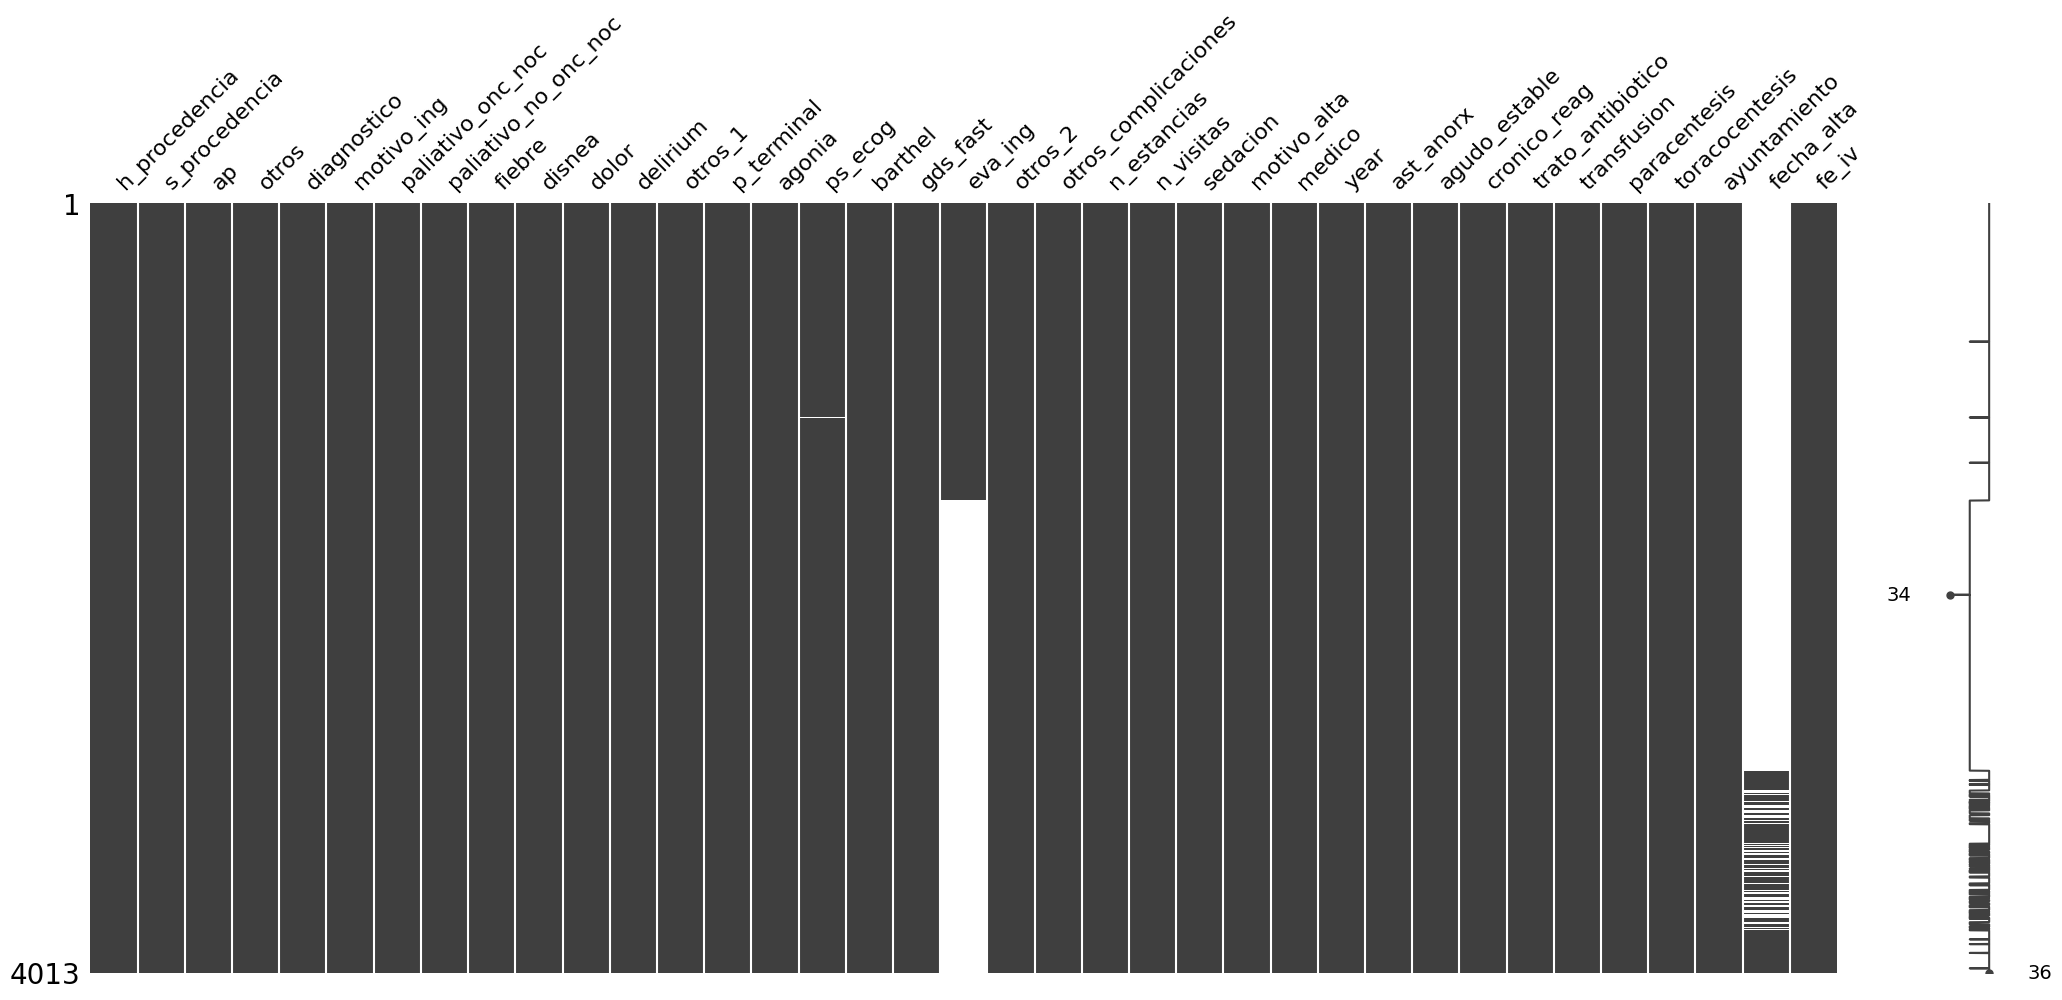

In [10]:
import missingno as msno
msno.matrix(df)

### 1.1.2 Análisis de valores atípicos (Outliers)

<Axes: >

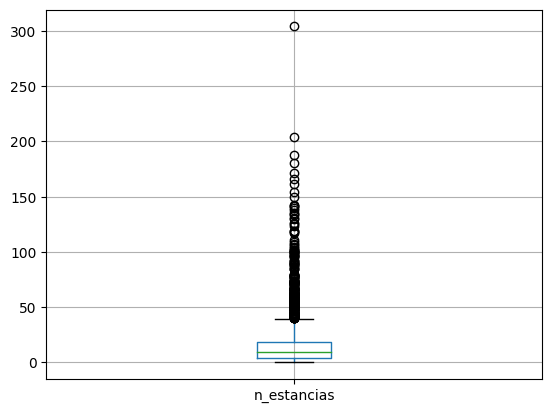

In [11]:
df.boxplot(column='n_estancias')

### 1.1.3 Análisis de la relación entre variables categóricas y numéricas

<Axes: xlabel='diagnostico', ylabel='n_estancias'>

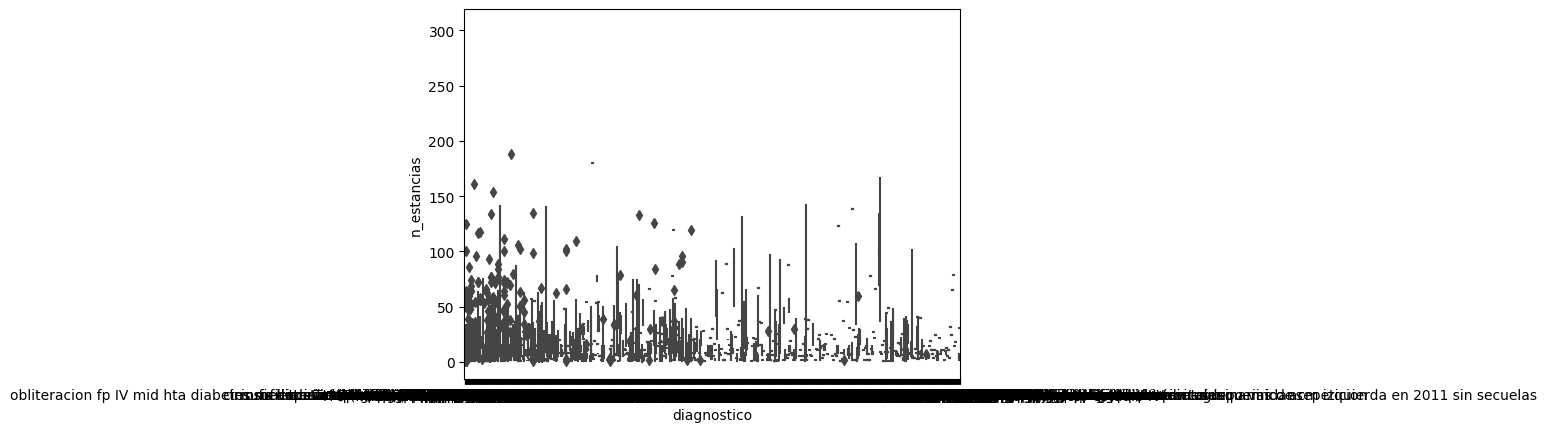

In [12]:
import seaborn as sns
sns.boxplot(x='diagnostico', y='n_estancias', data=df)

### 1.1.4 Análisis de distribuciones de probabilidad

[07/06/23 10:57:23] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Temp\ipykernel_23744\1986926358.py:1:                            
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df['n_estancias'])                                                     
                                                                                                                   

<Axes: xlabel='n_estancias', ylabel='Density'>

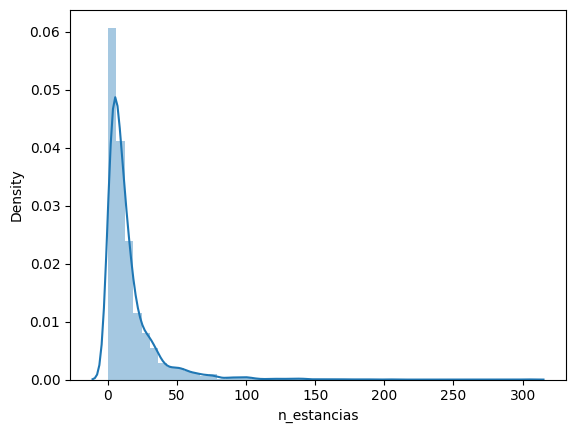

In [13]:
sns.distplot(df['n_estancias'])

### 1.1.5 Creación de perfiles de informes de datos

In [14]:
import ydata_profiling
profile = ydata_profiling.ProfileReport(df)
profile.to_file('output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

[07/06/23 10:57:24] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\ydata_profiling\mode                
                             l\typeset_relations.py:116: UserWarning: Parsing dates in DD/MM/YYYY                  
                             format when dayfirst=False (the default) was specified. This may lead                 
                             to inconsistently parsed dates! Specify a format to ensure consistent                 
                             parsing.                                                                              
                               return series.astype("datetime64")                                                  
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\ydata_profiling\mode                
                             l\typeset_relations.py:116: UserWarning: Parsing dates in DD/MM/YYYY                  
                             format when dayfirst=False (the default) was specified. This may lead                 
                             to inconsistently parsed dates! Specify a format to ensure consistent                 
                             parsing.                                                                              
                               return series.astype("datetime64")                                                  
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\ydata_profiling\mode                
                             l\typeset_relations.py:116: UserWarning: Parsing dates in DD/MM/YYYY                  
                             format when dayfirst=False (the default) was specified. This may lead                 
                             to inconsistently parsed dates! Specify a format to ensure consistent                 
                             parsing.                                                                              
                               return series.astype("datetime64")                                                  
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\ydata_profiling\mode                
                             l\typeset_relations.py:116: UserWarning: Parsing dates in DD/MM/YYYY                  
                             format when dayfirst=False (the default) was specified. This may lead                 
                             to inconsistently parsed dates! Specify a format to ensure consistent                 
                             parsing.                                                                              
                               return series.astype("datetime64")                                                  
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\ydata_profiling\mode                
                             l\typeset_relations.py:116: UserWarning: Parsing dates in DD/MM/YYYY                  
                             format when dayfirst=False (the default) was specified. This may lead                 
                             to inconsistently parsed dates! Specify a format to ensure consistent                 
                             parsing.                                                                              
                               return series.astype("datetime64")                                                  
                                                                                                                   

[07/06/23 10:57:26] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\ydata_profiling\visu                
                             alisation\context.py:85: MatplotlibDeprecationWarning: mplDeprecation                 
                             was deprecated in Matplotlib 3.6 and will be removed two minor                        
                             releases later. Use matplotlib.MatplotlibDeprecationWarning instead.                  
                               warnings.filterwarnings("ignore",                                                   
                             category=matplotlib.cbook.mplDeprecation)                                             
                                                                                                                   

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

[07/06/23 10:57:28] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

[07/06/23 10:57:29] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

[07/06/23 10:57:30] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

[07/06/23 10:57:31] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

[07/06/23 10:57:32] WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

                    WARNING  C:\Users\Pablo Villar\Desktop\CURSOS\KSchool\Máster en Data            warnings.py:109
                             Science\TFM\nuevo_entorno_kedro\lib\site-packages\wordcloud\wordcloud.                
                             py:106: MatplotlibDeprecationWarning: The get_cmap function was                       
                             deprecated in Matplotlib 3.7 and will be removed two minor releases                   
                             later. Use ``matplotlib.colormaps[name]`` or                                          
                             ``matplotlib.colormaps.get_cmap(obj)`` instead.                                       
                               self.colormap = plt.cm.get_cmap(colormap)                                           
                                                                                                                   

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)
profile.to_file("output.html")

[07/06/23 10:57:36] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Temp\ipykernel_23744\2253697665.py:1:                            
                             DeprecationWarning: `import pandas_profiling` is going to be                          
                             deprecated by April 1st. Please use `import ydata_profiling` instead.                 
                               import pandas_profiling                                                             
                                                                                                                   

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 1.1.6 Verificación de la linealidad

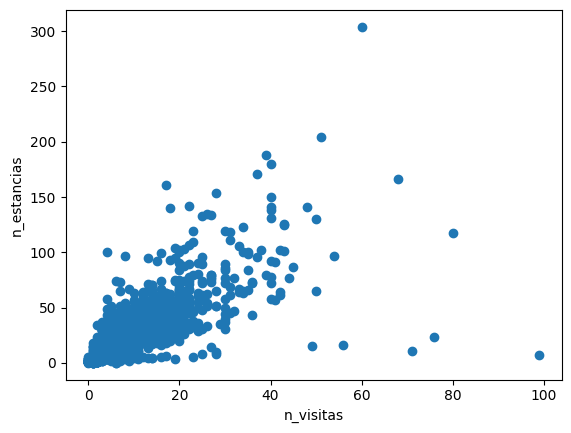

In [16]:
plt.scatter(df['n_visitas'], df['n_estancias'])
plt.xlabel('n_visitas', )
plt.ylabel('n_estancias')
plt.show()

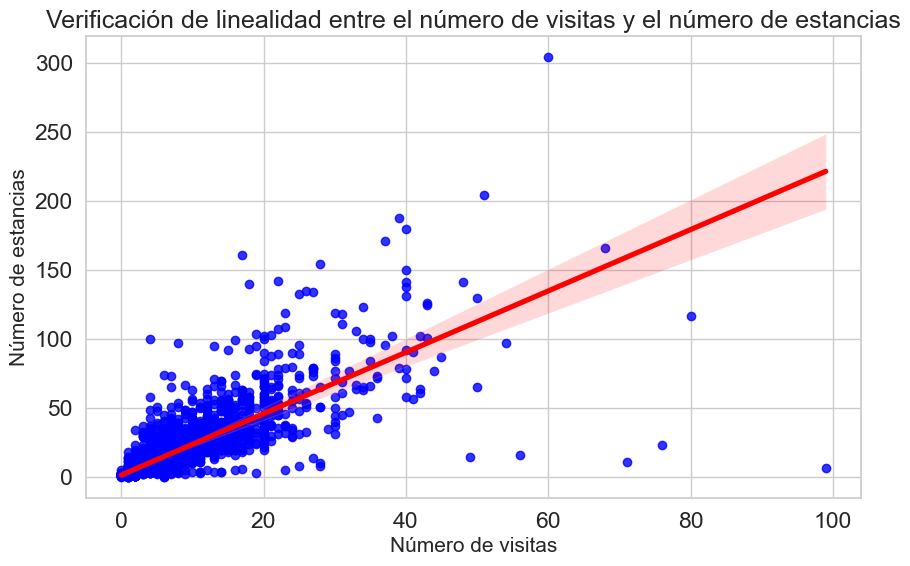

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establece el estilo y el contexto para hacer que los gráficos sean más bonitos
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Crea una figura y un eje
fig, ax = plt.subplots(figsize=(10, 6))

# Dibuja un gráfico de dispersión con un ajuste lineal
sns.regplot(x='n_visitas', y='n_estancias', data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

# Establece las etiquetas de los ejes y el título
ax.set_xlabel('Número de visitas', fontsize=15)
ax.set_ylabel('Número de estancias', fontsize=15)
ax.set_title('Verificación de linealidad entre el número de visitas y el número de estancias', fontsize=18)

# Muestra el gráfico
plt.show()


## 1.2 Análisis univariado

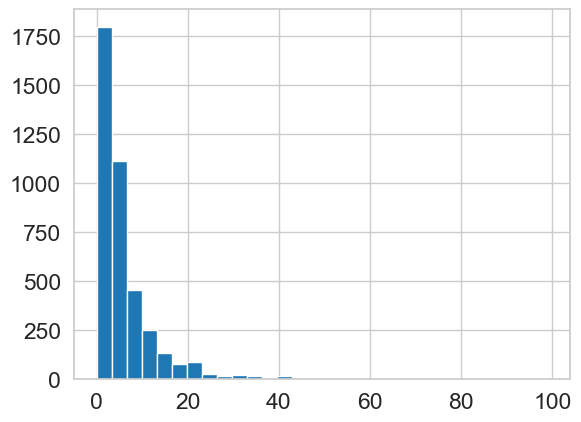

In [18]:
df['n_visitas'].hist(bins=30);

## 1.3 Análisis bivariado

In [19]:
df[['n_visitas','n_estancias']].sort_values(ascending=False, by='n_visitas')

n_visitas  n_estancias
3340         99            7
3691         80          117
3021         76           23
2658         71           11
3115         68          166
735          60          304
1837         56           16
2323         54           97
1972         51          204
1403         50          130
3920         50           65
3112         49           15
350          48          141
305          45           87
3769         44           77
3344         43          101
3311         43          125
1468         43          126
2915         42           64
3766         42           61
2029         42          102
2003         41           91
2309         41           57
2166         40           72
58           40           92
2621         40          141
2930         40          138
1410         40           78
2427         40          131
2434         40          150
789          40          180
3874         40           58
3936         39           79
3301         39          188
3191         38          102
3993         37          171
130          37           96
3745         36           43
1411         36           72
2085         36           73
3088         35           66
106          35           98
3389         35          100
832          35           84
131          34          100
1081         34           65
2205         34           63
2829         34          123
923          33          106
477          33           67
1814         33           64
2204         32           47
2759         32           77
1016         31          111
3796         31          118
2916         31           61
2021         31           45
24           31           69
1094         30           77
1191         30           44
1206         30           84
1380         30           58
961          30           86
3436         30           40
2255         30          119
3912         30           37
2026         30           50
1919         30           31
1964         30           89
2800         30           72
1825         29           35
2016         28           51
568          28           51
3184         28          154
1949         28           65
1781         28           10
1733         28            8
908          27           76
1869         27           14
831          27           78
2561         27          134
983          27           73
994          27           79
1958         27           79
2555         26           54
842          26          135
1699         26           51
2214         26           53
2315         26           33
3398         26           62
2889         25           96
3127         25          133
2761         25           48
1415         25           57
2659         25            8
2006         25           89
596          25           72
1186         25           31
1036         25           74
1114         25           61
1209         24           55
3480         24           30
270          24           50
3729         24           29
3937         24           60
3739         24           36
3763         24           34
2693         24           90
3033         24           80
2285         24           63
2661         23          109
2083         23           37
1417         23          119
2076         23           37
1687         23           32
1382         23           38
1706         23            5
187          23           46
2472         23           79
2990         22           66
3051         22           78
1734         22           52
2015         22           74
2979         22           48
3188         22           31
1009         22           52
3165         22           59
3130         22           58
2892         22           54
3639         22           53
3650         22           89
2958         22          107
293          22           45
2630         22           49
2626         22          142
326          22           67
3539         22           45
1216

In [20]:
df[['n_visitas','n_estancias']].sort_values(ascending=False, by='n_estancias')
# Detecto que 7122 estancias puede ser un dato fuera de lo comun y sospecho que 3040 y 2040 tambien

n_visitas  n_estancias
735          60          304
1972         51          204
3301         39          188
789          40          180
3993         37          171
3115         68          166
1504         17          161
3184         28          154
2434         40          150
2626         22          142
350          48          141
2621         40          141
1332         18          140
2930         40          138
842          26          135
2561         27          134
3127         25          133
2427         40          131
1403         50          130
1468         43          126
3311         43          125
2829         34          123
1417         23          119
2255         30          119
3796         31          118
3691         80          117
1016         31          111
2661         23          109
2958         22          107
923          33          106
996          19          104
21           21          103
2029         42          102
3191         38          102
2491         20          102
3344         43          101
131          34          100
2233         20          100
2417          4          100
3389         35          100
691          16           99
106          35           98
2323         54           97
3217          8           97
2889         25           96
130          37           96
2019         19           95
2177         13           95
1933         18           93
58           40           92
3866         15           92
2003         41           91
2693         24           90
1262         20           90
2006         25           89
1964         30           89
3650         22           89
2479         21           88
305          45           87
961          30           86
832          35           84
1206         30           84
2834         20           84
3033         24           80
2472         23           79
3936         39           79
994          27           79
1958         27           79
3051         22           78
831          27           78
1410         40           78
1094         30           77
3769         44           77
2759         32           77
908          27           76
758          20           75
927          19           75
527          16           74
2690         19           74
2678         21           74
1103          6           74
1036         25           74
2015         22           74
2085         36           73
628           7           73
983          27           73
596          25           72
1411         36           72
1514         20           72
2166         40           72
2800         30           72
488          20           71
3304         13           71
1216         22           71
3048         20           70
999          14           70
3690         14           70
24           31           69
348          20           68
2898          9           67
477          33           67
2225         16           67
326          22           67
3088         35           66
1766         14           66
3603         20           66
1170         20           66
2990         22           66
2985         13           66
1081         34           65
2547         21           65
3920         50           65
2120          7           65
1898         20           65
1949         28           65
2915         42           64
1293         12           64
721          21           64
1814         33           64
2205         34           63
2285         24           63
788          10           63
718          17           63
3379         17           63
2488         17           62
1932         18           62
3398         26           62
3797         14           62
3368         16           62
2916         31           61
1114         25           61
3766         42           61
2207         20           60
2224         12           60
3937         24           60
979          17           60
3075         20           60
2971

In [21]:
round(df.groupby('n_visitas')['n_estancias'].mean(),0)

n_visitas
0       2.0
1       2.0
2       5.0
3       8.0
4      11.0
5      13.0
6      14.0
7      18.0
8      20.0
9      24.0
10     26.0
11     25.0
12     32.0
13     34.0
14     35.0
15     38.0
16     36.0
17     42.0
18     45.0
19     48.0
20     52.0
21     54.0
22     64.0
23     56.0
24     53.0
25     67.0
26     65.0
27     76.0
28     56.0
29     35.0
30     66.0
31     81.0
32     62.0
33     79.0
34     88.0
35     87.0
36     63.0
37    134.0
38    102.0
39    134.0
40    116.0
41     74.0
42     76.0
43    117.0
44     77.0
45     87.0
48    141.0
49     15.0
50     98.0
51    204.0
54     97.0
56     16.0
60    304.0
68    166.0
71     11.0
76     23.0
80    117.0
99      7.0
Name: n_estancias, dtype: float64

In [22]:
round(df.groupby('diagnostico')['n_estancias'].mean(),0)

diagnostico
ITU (infeccion del tracto urinario)                                                                                                                                                                                              11.0
ITU (infeccion del tracto urinario) (infeccion del tracto urinario)                                                                                                                                                               5.0
ITU (infeccion del tracto urinario) acv                                                                                                                                                                                           2.0
ITU (infeccion del tracto urinario) agitacion                                                                                                                                                                                     2.0
ITU (infeccion del tracto urinario) anciano fragil                  

In [23]:
round(df.groupby('dolor')['n_estancias'].mean(),0)

dolor
ni    15.0
no    12.0
si    20.0
Name: n_estancias, dtype: float64

In [24]:
round(df.groupby('fiebre')['n_estancias'].mean(),0)

fiebre
b        49.0
ni       15.0
no       14.0
si       19.0
vacio     2.0
Name: n_estancias, dtype: float64

In [25]:
round(df.groupby('h_procedencia')['n_estancias'].mean(),0)

h_procedencia
ap                       2.0
chuac                   15.0
clinico                 17.0
conxo                   18.0
gil casares             14.0
hula                     5.0
lucus augusti            2.0
no                      11.0
pontevedra               2.0
provincial              21.0
quiron la coruna         8.0
residencia               3.0
rosaleda                32.0
salnes                   7.0
san rafael la coruna     0.0
si                       7.0
Name: n_estancias, dtype: float64

In [26]:
round(df.groupby('motivo_ing')['n_estancias'].mean(),0)

motivo_ing
adiestramiento nutricion y control sintomas                                                                               90.0
admininistacion octreotido                                                                                                 3.0
admininistracio de antibiotico IV                                                                                         13.0
administracion 5 azatadina                                                                                                 6.0
administracion aciclovir IV                                                                                               11.0
administracion alprostadil IV                                                                                             12.0
administracion antibiotico IV                                                                                             16.0
administracion calcio IV                                                                            

In [27]:
df.corr()

[07/06/23 10:57:47] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Temp\ipykernel_23744\1134722465.py:1:                            
                             FutureWarning: The default value of numeric_only in DataFrame.corr is                 
                             deprecated. In a future version, it will default to False. Select only                
                             valid columns or specify the value of numeric_only to silence this                    
                             warning.                                                                              
                               df.corr()                                                                           
                                                                                                                   

n_estancias  n_visitas      year
n_estancias     1.000000   0.793435  0.012830
n_visitas       0.793435   1.000000  0.032375
year            0.012830   0.032375  1.000000

## 1.4 Visualización de datos

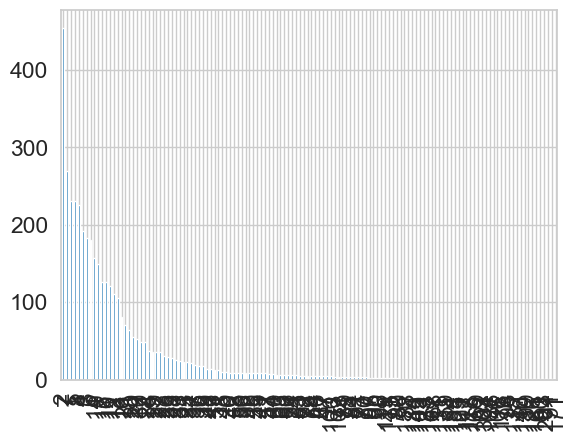

In [28]:
import matplotlib.pyplot as plt

# Gráfico de barras
#plt.hist(data=df, x=df['n_estancias'] ,bins=30)
df['n_estancias'].value_counts().plot(kind='bar')
plt.show()

[07/06/23 10:57:48] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Temp\ipykernel_23744\2312080331.py:4:                            
                             FutureWarning: The default value of numeric_only in DataFrame.corr is                 
                             deprecated. In a future version, it will default to False. Select only                
                             valid columns or specify the value of numeric_only to silence this                    
                             warning.                                                                              
                               sns.heatmap(df.corr(), annot=True)                                                  
                                                                                                                   

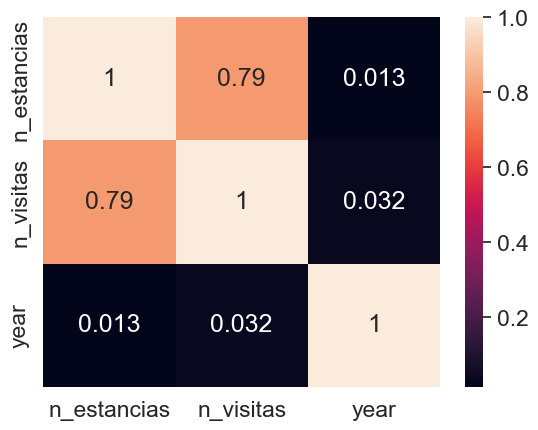

In [29]:
import seaborn as sns

# Mapa de calor
sns.heatmap(df.corr(), annot=True)
plt.show()

# 2. Data preprocessing

## 2.1 Limpieza de datos

<Axes: >

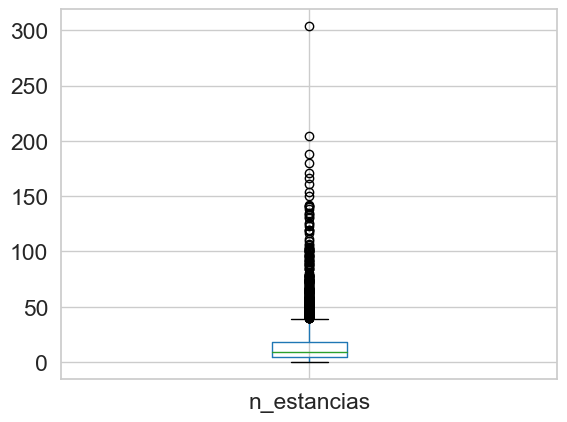

In [30]:
df.boxplot(column='n_estancias')

### 1.1.3 Análisis de la relación entre variables categóricas y numéricas

<Axes: xlabel='ast_anorx', ylabel='n_estancias'>

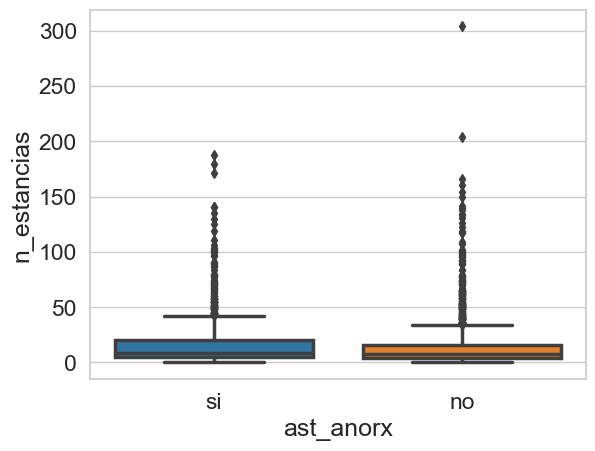

In [31]:
import seaborn as sns
sns.boxplot(x='ast_anorx', y='n_estancias', data=df, dodge=True )

### 1.1.4 Análisis de distribuciones de probabilidad

                    WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Temp\ipykernel_23744\1986926358.py:1:                            
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df['n_estancias'])                                                     
                                                                                                                   

<Axes: xlabel='n_estancias', ylabel='Density'>

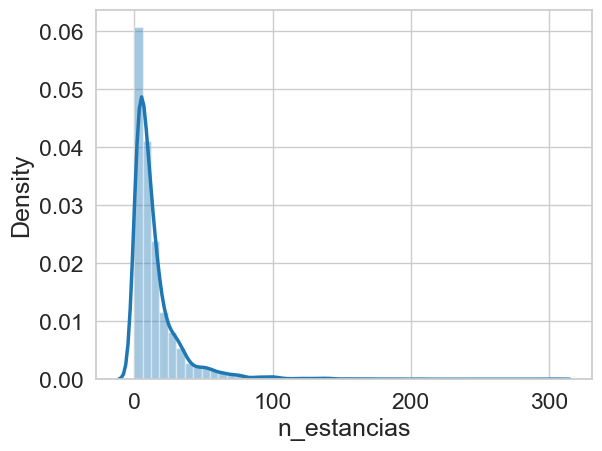

In [32]:
sns.distplot(df['n_estancias'])

# 3. Feature selection

# 4. Regression model training

# 5.Dataframes

In [128]:
a=pd.DataFrame(df['n_estancias'].value_counts())
a.reset_index(inplace=True)

In [129]:
b=pd.DataFrame(df['n_visitas'].value_counts())
b.reset_index(inplace=True)

<BarContainer object of 128 artists>

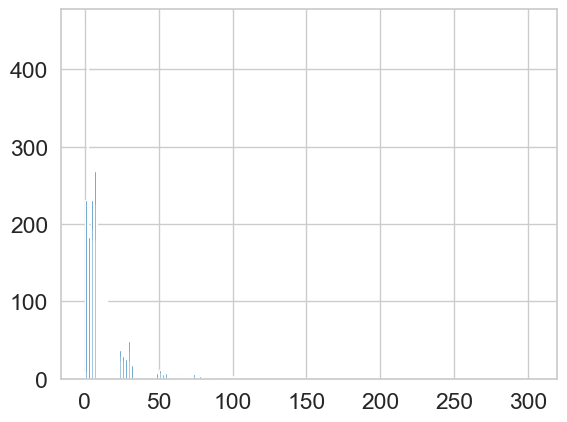

In [130]:
plt.bar(a['index'],a['n_estancias'])

<BarContainer object of 58 artists>

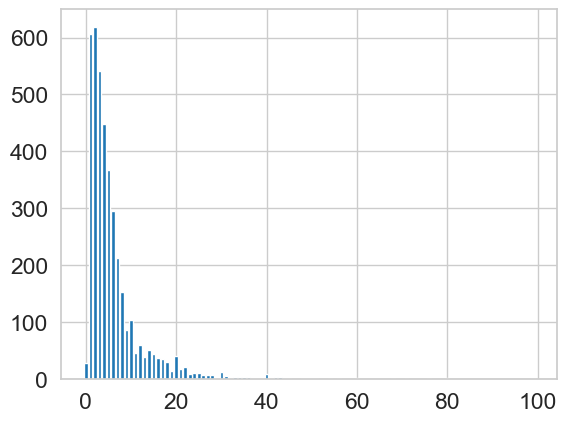

In [131]:
plt.bar(b['index'],b['n_visitas'])

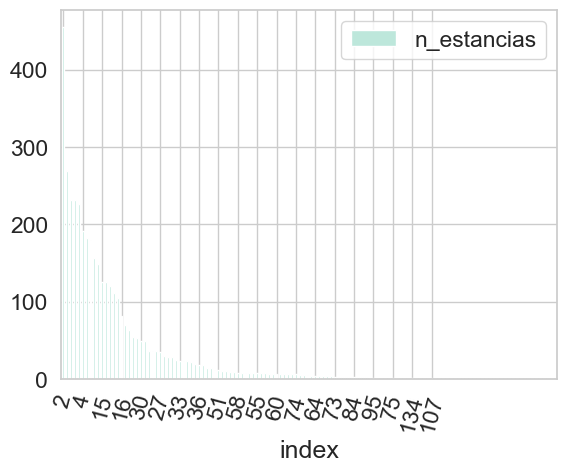

In [143]:
a.plot(kind='bar',x='index',y='n_estancias',colormap='icefire')
plt.xticks(np.arange(0, 100, step=5),rotation=75,)
plt.show()

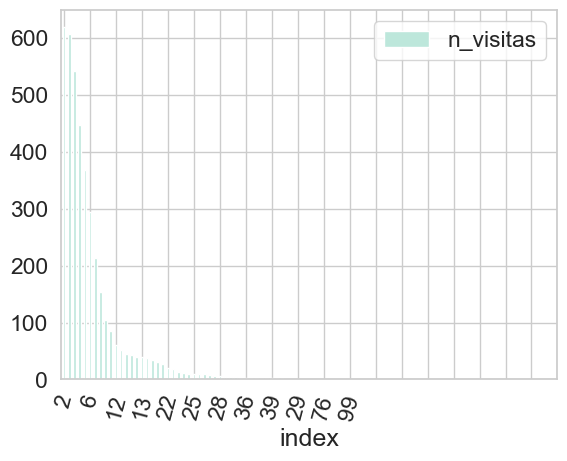

In [142]:
b.plot(kind='bar',x='index',y='n_visitas',colormap='icefire')
plt.xticks(np.arange(0, 100, step=5),rotation=75,)
plt.show()

In [80]:
c=df['n_estancias']
mean=c.mean()
median=np.median(c)
mode=c.mode()

In [81]:
d=df['n_visitas']
mean=d.mean()
median=np.median(d)
mode=d.mode()

[07/06/23 11:18:47] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Temp\ipykernel_23744\3583348192.py:1:                            
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `kdeplot` (an axes-level function for kernel                  
                             density plots).                                                                       
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(c,hist=False)                                                          
                                                                                                                   

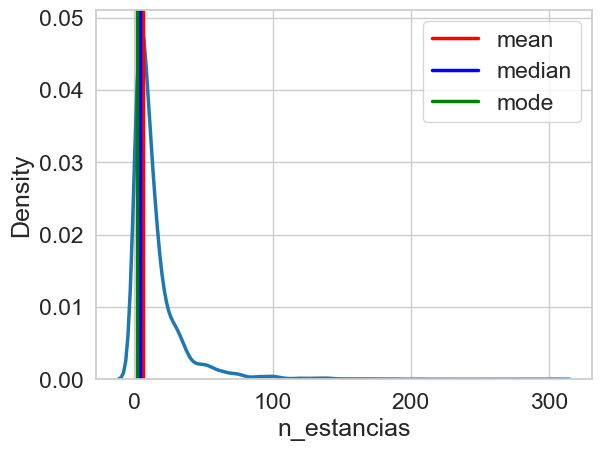

In [82]:
sns.distplot(c,hist=False)
plt.axvline(mean,color='r',label='mean')
plt.axvline(median,color='b',label='median')
plt.axvline(mode[0],color='g',label='mode')
plt.legend()
plt.show()

[07/06/23 11:18:54] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Temp\ipykernel_23744\480719061.py:1: UserWarning:                
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `kdeplot` (an axes-level function for kernel                  
                             density plots).                                                                       
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(d,hist=False)                                                          
                                                                                                                   

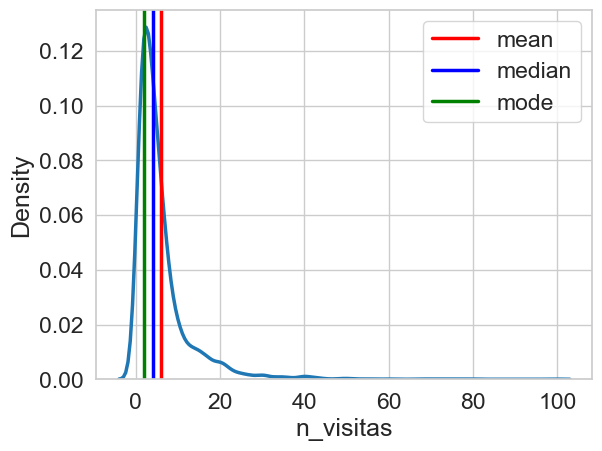

In [83]:
sns.distplot(d,hist=False)
plt.axvline(mean,color='r',label='mean')
plt.axvline(median,color='b',label='median')
plt.axvline(mode[0],color='g',label='mode')
plt.legend()
plt.show()

In [100]:
x=pd.DataFrame(pd.pivot_table(df,index=['motivo_alta','year'],aggfunc='count')['n_visitas'])

In [101]:
x

n_visitas
motivo_alta                                        year           
alta paso a urgencias                              2020          1
alta paso por urgencias                            2022          1
alta por paso a urgencias                          2022          4
buen control de sintomas                           2018          2
cambio de domicilio fuera de area asistencial d... 2018          1
claudicacion familiar                              2019          1
consulta medica                                    2019          1
cuidados ap                                        2021          1
derivado urgencias                                 2021          1
desconocido                                        2018          1
domicilio                                          2021          1
estable en su enfermedad                           2018          1
exitus                                             2017        187
                                                   2018        177
                                                   2019        116
                                                   2020        182
                                                   2021        255
                                                   2022        295
exitus comunicado por la familia                   2020          1
fin cuidados                                       2018        160
                                                   2019        134
                                                   2020        296
                                                   2021        348
                                                   2022        398
fin de cuidados                                    2017        337
                                                   2018        142
                                                   2019        123
                                                   2020        102
                                                   2021         81
                                                   2022        259
imposibilidad de cuidados en domicilio del paci... 2019          1
ingreso cgd                                        2021          1
ingreso cirugia vascular                           2022          1
ingreso en cplastica                               2020          1
ingreso en cvascular                               2021          1
ingreso en digestivo                               2020          3
ingreso en digestivo clinico                       2017          1
ingreso en huac para transplante pulmonar          2019          1
ingreso en medicina interna                        2022          1
ingreso en mir                                     2020          1
                                                   2021          1
ingreso en nrc                                     2018          1
ingreso en nrl                                     2017          1
                                                   2022          1
ingreso en oncologia                               2018          1
                                                   2020          1
                                                   2021          2
                                                   2022          3
ingreso en orl                                     2022          2
ingreso en upal                                    2019          2
                                                   2020          6
                                                   2021          2
                                                   2022          3
ingreso en utr                                     2022          1
ingreso medicina interna                           2022          1
ingreso mir                                        2021          1
ingreso nml clinico                                2017          1
ingreso oncologia                                  2022          1
ingreso para trasplante              

In [104]:
x.loc['exitus', 2020].sum()/x.loc['exitus'].sum()*100

n_visitas    15.016502
dtype: float64

In [105]:
df['diagnostico'][df['motivo_alta']=='exitus'].value_counts(normalize=True)*100

cancer de pulmon                                                                                         3.382838
cancer de colon                                                                                          2.310231
anciano fragil                                                                                           2.062706
cancer pulmon estadio IV                                                                                 1.732673
cancer pancreas                                                                                          1.650165
cancer pulmon                                                                                            1.567657
cancer mama estadio IV                                                                                   1.485149
anciana fragil                                                                                           1.485149
glioblastoma                                                                            

In [106]:
df['motivo_ing'].unique()

array(['control de sintomas', 'mal control dolor', 'control evolutivo',
       'admininistacion octreotido', 'transfusion', 'infosteosintesis',
       'dolor', 'valoracion', 'dolor abdominal', 'infeccion respiratoria',
       'neumonia', 'control sintomas', 'celulitis', 'tratamiento',
       'broncoaspiracion', 'inyeccion octreotrido', 'control dolor',
       'tratamiento antibiotico IV', 'recambio peg', 'curas',
       'postoperatorio', 'angustia', 'diarrea', 'valoracion ulcera',
       'valoracion ulceras', 'paracentesis', 'itu',
       'continuacion cuidados', 'fiebre y dolor costal', 'antibioterapia',
       'ulcera tumoral', 'tratamiento IV', 'dolo abdominal',
       'curas herida quirurgica', 'ascitis',
       'deterioor del estado general', 'infeccion urinaria',
       'bronquiectasias infectadas', 'seguimiento', 'fiebre', 'hierro IV',
       'administracion seguril IV', 'control analgesico',
       'seguimineto evolutivo ajuste de tratamiento',
       'tratamiento IV y control 

In [107]:
words = ['control', 'cancer']
regex = r'\b(?:{})\b'.format('|'.join(words))
df['diagnostico'].str.contains(regex, case=False, regex=True)\
                 .value_counts()

False    3202
True      811
Name: diagnostico, dtype: int64

In [111]:
df['motivo_ing'][df['diagnostico'].str.contains('cancer')].value_counts(normalize=True)*100

control de sintomas                                                   58.436725
control sintomas                                                      10.918114
continuacion de cuidados                                               1.612903
cuidados paliativos                                                    1.612903
valoracion                                                             1.612903
seguimiento                                                            1.488834
antibioterapia IV                                                      1.488834
dolor                                                                  1.364764
tratamiento antibiotico IV                                             0.992556
transfusion                                                            0.744417
control analgesico                                                     0.744417
anemia                                                                 0.744417
control evolutivo                       

In [112]:
df['dolor'].unique()

array(['si', 'no', 'ni'], dtype=object)

In [113]:
df_dolor = df.copy()

In [115]:
df_dolor.head(10)

h_procedencia  s_procedencia  ap otros                  diagnostico  \
0   gil casares           upal  no    no                   cancer orl   
1       clinico      oncologia  no    no              melanoma vulvar   
2       clinico            mir  no    no          cancer broncogenico   
3       clinico      digestivo  no    no            cirrosis hepatica   
4       clinico      urgencias  no    no  neplasia de mama estadio IV   
5            no             no  si    no                       anemia   
6       clinico      oncologia  no    no            adenoca de pulmon   
7       clinico    hematologia  no    no   leucemia linfatica cronica   
8       clinico  traumatologia  no    no             fx meseta tibial   
9       clinico      urgencias  no    no               cancer de mama   

                   motivo_ing paliativo_onc_noc paliativo_no_onc_noc fiebre  \
0         control de sintomas                si                   si     no   
1           mal control dolor                si                   no     no   
2           control evolutivo                si                   si     no   
3  admininistacion octreotido                no                   no     no   
4         control de sintomas                si                   no     no   
5                 transfusion                no                   no     no   
6         control de sintomas                si                   no     no   
7                 transfusion                si                   no     no   
8            infosteosintesis                no                   no     no   
9         control de sintomas                si                   no     no   

  disnea dolor delirium        otros_1 p_terminal agonia ps_ecog barthel  \
0     no    si       no             no         si     no      40     300   
1     no    si       no             no         si     no      34      no   
2     si    no       no             no         no     no      34     400   
3     no    no       no             no         no     no      10     900   
4     si    si       no             no         si     no      40     300   
5     no    no       no             no         no     no      no     500   
6     si    no       no  estrenimiento         si     no      34     600   
7     no    no       no             no         no     no      12     600   
8     no    no       no      mucositis         no     no      34     600   
9     si    si       no             no         si     no      40      60   

  gds_fast eva_ing otros_2             otros_complicaciones  n_estancias  \
0       no      no      no           reingreso en urgencias           21   
1       no      no      no          met pulmonares y digest           24   
2       no      no      no                               no           14   
3       no      no      no                               no            1   
4       no      70      no                               no            2   
5       no      no      no                               no            2   
6       no      no      no  claudicacion familiar domicilio           13   
7       no      no      no                               no            2   
8       no      no      no                               no           22   
9       no      no      no                               no            5   

   n_visitas sedacion                     motivo_alta               medico  \
0         10       no                       reingreso               valdes   
1          8       no                          exitus          galego feal   
2          6       no                 fin de cuidados         lopez renedo   
3          1       no                 fin de cuidados         lopez renedo   
4          1       no                          exitus         lopez renedo   
5          2       no                 fin de cuidados  villar del castillo   
6          5       no  reingreso por urgencias a hado            valcarcel   
7          1       no         

In [116]:
df_dolor['dolor LE']=df_dolor['dolor'].replace({'no':0,'si':1, 'ni':2})#replace returns numerical value as int type
df_dolor['dolor LE map']=df_dolor['dolor'].map({'no':0,'si':1, 'ni':2})# map returns numeric values as category type
df_dolor.head()

h_procedencia s_procedencia  ap otros                  diagnostico  \
0   gil casares          upal  no    no                   cancer orl   
1       clinico     oncologia  no    no              melanoma vulvar   
2       clinico           mir  no    no          cancer broncogenico   
3       clinico     digestivo  no    no            cirrosis hepatica   
4       clinico     urgencias  no    no  neplasia de mama estadio IV   

                   motivo_ing paliativo_onc_noc paliativo_no_onc_noc fiebre  \
0         control de sintomas                si                   si     no   
1           mal control dolor                si                   no     no   
2           control evolutivo                si                   si     no   
3  admininistacion octreotido                no                   no     no   
4         control de sintomas                si                   no     no   

  disnea dolor delirium otros_1 p_terminal agonia ps_ecog barthel gds_fast  \
0     no    si       no      no         si     no      40     300       no   
1     no    si       no      no         si     no      34      no       no   
2     si    no       no      no         no     no      34     400       no   
3     no    no       no      no         no     no      10     900       no   
4     si    si       no      no         si     no      40     300       no   

  eva_ing otros_2     otros_complicaciones  n_estancias  n_visitas sedacion  \
0      no      no   reingreso en urgencias           21         10       no   
1      no      no  met pulmonares y digest           24          8       no   
2      no      no                       no           14          6       no   
3      no      no                       no            1          1       no   
4      70      no                       no            2          1       no   

       motivo_alta        medico  year ast_anorx agudo_estable cronico_reag  \
0        reingreso        valdes  2017        si         vacio        vacio   
1           exitus   galego feal  2017        si         vacio        vacio   
2  fin de cuidados  lopez renedo  2017        no         vacio        vacio   
3  fin de cuidados  lopez renedo  2017        no         vacio        vacio   
4           exitus  lopez renedo  2017        no         vacio        vacio   

  trato_antibiotico transfusion paracentesis toracocentesis ayuntamiento  \
0             vacio       vacio        vacio          vacio  desconocido   
1             vacio       vacio        vacio          vacio  desconocido   
2             vacio       vacio        vacio          vacio  desconocido   
3             vacio       vacio        vacio          vacio  desconocido   
4             vacio       vacio        vacio          vacio  desconocido   

  fecha_alta  fe_iv  dolor LE  dolor LE map  
0        NaN  vacio         1             1  
1        NaN  vacio         1             1  
2        NaN  vacio         0             0  
3        NaN  vacio         0             0  
4        NaN  vacio         1             1

In [117]:
df_dolor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4013 entries, 0 to 4012
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   h_procedencia         4013 non-null   object
 1   s_procedencia         4013 non-null   object
 2   ap                    4013 non-null   object
 3   otros                 4013 non-null   object
 4   diagnostico           4013 non-null   object
 5   motivo_ing            4013 non-null   object
 6   paliativo_onc_noc     4013 non-null   object
 7   paliativo_no_onc_noc  4013 non-null   object
 8   fiebre                4013 non-null   object
 9   disnea                4013 non-null   object
 10  dolor                 4013 non-null   object
 11  delirium              4013 non-null   object
 12  otros_1               4013 non-null   object
 13  p_terminal            4013 non-null   object
 14  agonia                4013 non-null   object
 15  ps_ecog               4012 non-null   

In [118]:
from sklearn.preprocessing import LabelEncoder

In [119]:
lr=LabelEncoder()

In [120]:
df['LE Year']=lr.fit_transform(df['year'])

In [125]:
df[['LE Year', 'year']]Outlier treatment


LE Year  year
0           0  2017
1           0  2017
2           0  2017
3           0  2017
4           0  2017
5           0  2017
6           0  2017
7           0  2017
8           0  2017
9           0  2017
10          0  2017
11          0  2017
12          0  2017
13          0  2017
14          0  2017
15          0  2017
16          0  2017
17          0  2017
18          0  2017
19          0  2017
20          0  2017
21          0  2017
22          0  2017
23          0  2017
24          0  2017
25          0  2017
26          0  2017
27          0  2017
28          0  2017
29          0  2017
30          0  2017
31          0  2017
32          0  2017
33          0  2017
34          0  2017
35          0  2017
36          0  2017
37          0  2017
38          0  2017
39          0  2017
40          0  2017
41          0  2017
42          0  2017
43          0  2017
44          0  2017
45          0  2017
46          0  2017
47          0  2017
48          0  2017
49          0  2017
50          0  2017
51          0  2017
52          0  2017
53          0  2017
54          0  2017
55          0  2017
56          0  2017
57          0  2017
58          0  2017
59          0  2017
60          0  2017
61          0  2017
62          0  2017
63          0  2017
64          0  2017
65          0  2017
66          0  2017
67          0  2017
68          0  2017
69          0  2017
70          0  2017
71          0  2017
72          0  2017
73          0  2017
74          0  2017
75          0  2017
76          0  2017
77          0  2017
78          0  2017
79          0  2017
80          0  2017
81          0  2017
82          0  2017
83          0  2017
84          0  2017
85          0  2017
86          0  2017
87          0  2017
88          0  2017
89          0  2017
90          0  2017
91          0  2017
92          0  2017
93          0  2017
94          0  2017
95          0  2017
96          0  2017
97          0  2017
98          0  2017
99          0  2017
100         0  2017
101         0  2017
102         0  2017
103         0  2017
104         0  2017
105         0  2017
106         0  2017
107         0  2017
108         0  2017
109         0  2017
110         0  2017
111         0  2017
112         0  2017
113         0  2017
114         0  2017
115         0  2017
116         0  2017
117         0  2017
118         0  2017
119         0  2017
120         0  2017
121         0  2017
122         0  2017
123         0  2017
124         0  2017
125         0  2017
126         0  2017
127         0  2017
128         0  2017
129         0  2017
130         0  2017
131         0  2017
132         0  2017
133         0  2017
134         0  2017
135         0  2017
136         0  2017
137         0  2017
138         0  2017
139         0  2017
140         0  2017
141         0  2017
142         0  2017
143         0  2017
144         0  2017
145         0  2017
146         0  2017
147         0  2017
148         0  2017
149         0  2017
150         0  2017
151         0  2017
152         0  2017
153         0  2017
154         0  2017
155         0  2017
156         0  2017
157         0  2017
158         0  2017
159         0  2017
160         0  2017
161         0  2017
162         0  2017
163         0  2017
164         0  2017
165         0  2017
166         0  2017
167         0  2017
168         0  2017
169         0  2017
170         0  2017
171         0  2017
172         0  2017
173         0  2017
174         0  2017
175         0  2017
176         0  2017
177         0  2017
178         0  2017
179         0  2017
180         0  2017
181         0  2017
182         0  2017
183         0  2017
184         0  2017
185         0  2017
186         0  2017
187         0  2017
188         0  2017
189         0  2017
190         0  2017
191         0  2017
192         0  2017
193         0  2017
194         0  2017
195         0  2017
196         0  2017
197         0  2017
198         0  2017
199   

# 6.Seaborn

In [ ]:
import seaborn as sns

In [35]:
df.columns

Index(['h_procedencia', 's_procedencia', 'ap', 'otros', 'diagnostico',
       'motivo_ing', 'paliativo_onc_noc', 'paliativo_no_onc_noc', 'fiebre',
       'disnea', 'dolor', 'delirium', 'otros_1', 'p_terminal', 'agonia',
       'ps_ecog', 'barthel', 'gds_fast', 'eva_ing', 'otros_2',
       'otros_complicaciones', 'n_estancias', 'n_visitas', 'sedacion',
       'motivo_alta', 'medico', 'year', 'ast_anorx', 'agudo_estable',
       'cronico_reag', 'trato_antibiotico', 'transfusion', 'paracentesis',
       'toracocentesis', 'ayuntamiento', 'fecha_alta', 'fe_iv'],
      dtype='object')

[07/06/23 11:07:55] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Temp\ipykernel_23744\2803208319.py:1:                            
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df['n_visitas'])                                                       
                                                                                                                   

<Axes: xlabel='n_visitas', ylabel='Density'>

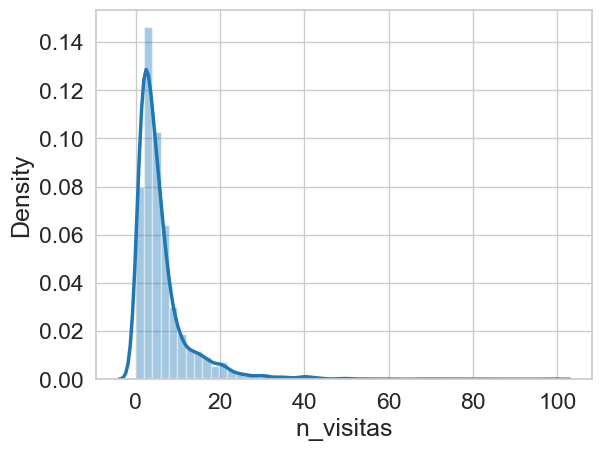

In [47]:
sns.distplot(df['n_visitas'])

[07/06/23 11:08:08] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Temp\ipykernel_23744\1986926358.py:1:                            
                             UserWarning:                                                                          
                                                                                                                   
                             `distplot` is a deprecated function and will be removed in seaborn                    
                             v0.14.0.                                                                              
                                                                                                                   
                             Please adapt your code to use either `displot` (a figure-level                        
                             function with                                                                         
                             similar flexibility) or `histplot` (an axes-level function for                        
                             histograms).                                                                          
                                                                                                                   
                             For a guide to updating your code to use the new functions, please see                
                             https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751                      
                                                                                                                   
                               sns.distplot(df['n_estancias'])                                                     
                                                                                                                   

<Axes: xlabel='n_estancias', ylabel='Density'>

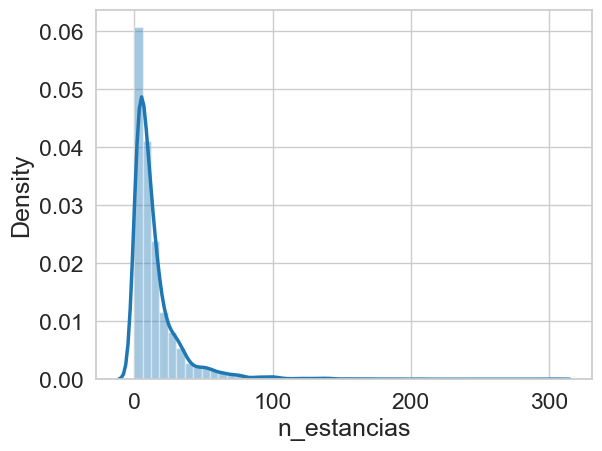

In [48]:
sns.distplot(df['n_estancias'])

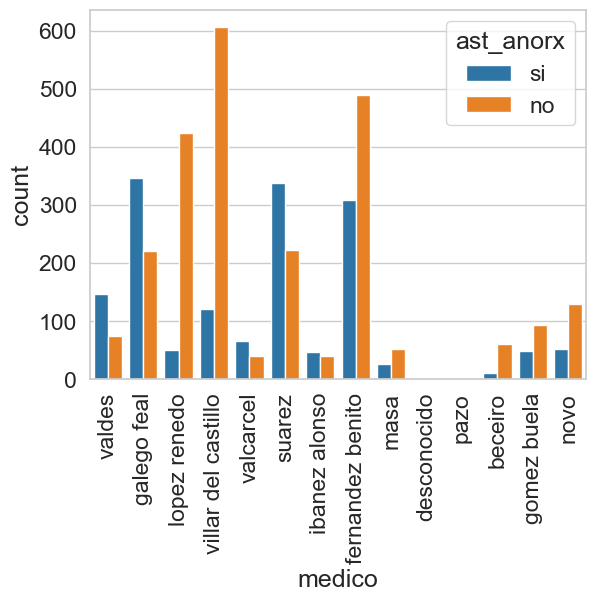

In [75]:
sns.countplot(x='medico',data=df,hue='ast_anorx',saturation=0.8)
plt.xticks(rotation=90)
plt.show()

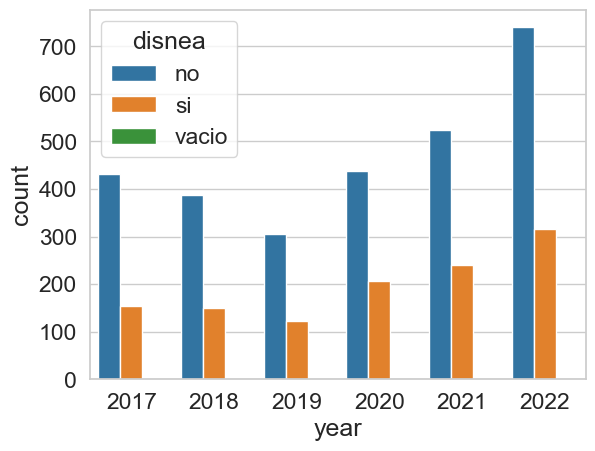

In [44]:
sns.countplot(x='year',data=df,hue='disnea')
plt.show()

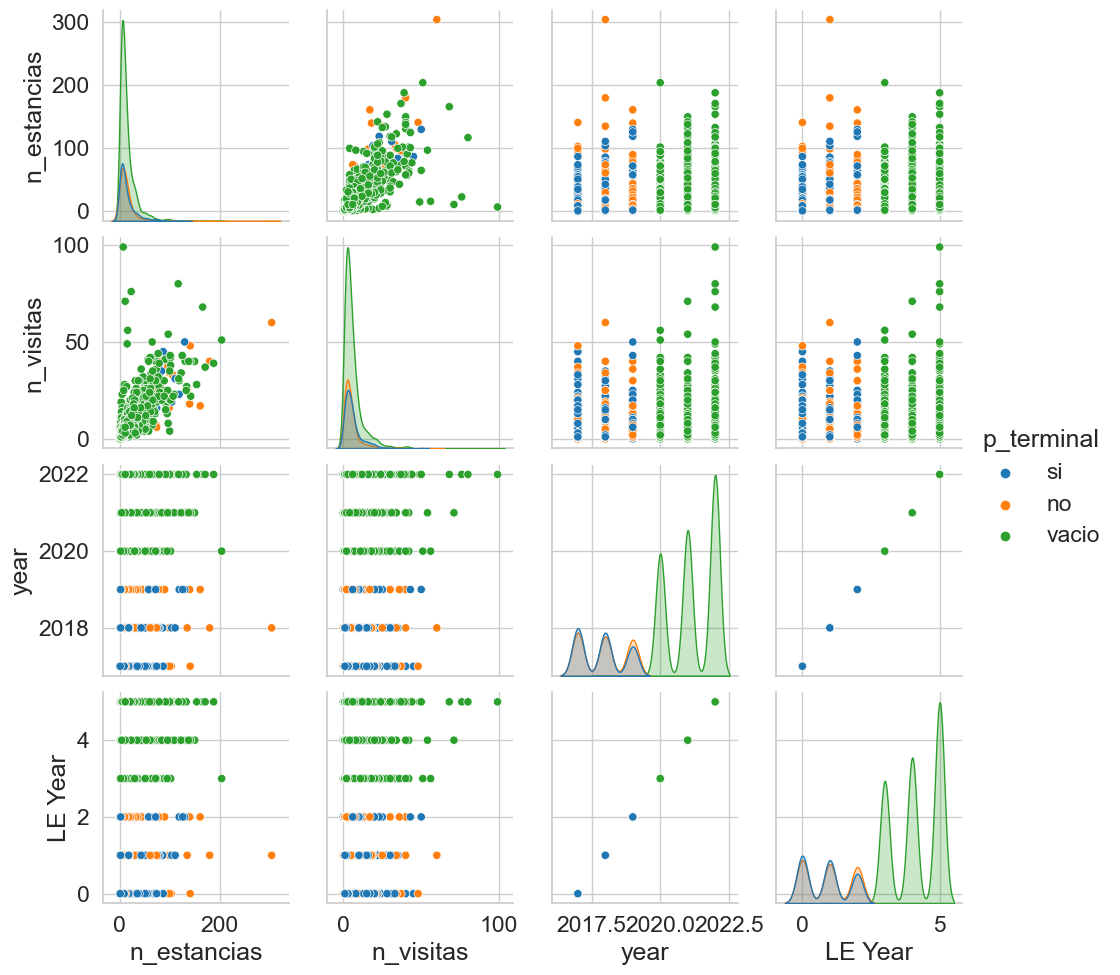

In [127]:
sns.pairplot(data=df, hue='p_terminal')
plt.show()

# 7.Outlier treatment
